### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()


In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

In [6]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(X_train_scaled.shape)
print(X_train_tsne.shape)

(404, 13)
(404, 2)


In [14]:
from pylab import rcParams

rcParams["figure.figsize"] = 9, 9

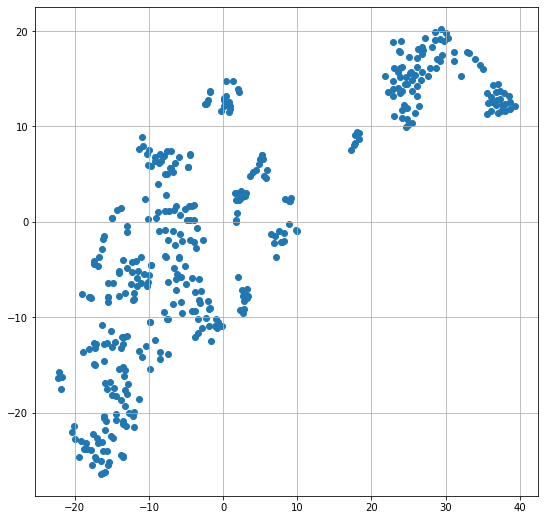

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.grid()
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [20]:
X_train_kmeans = kmeans.fit_predict(X_train_scaled)


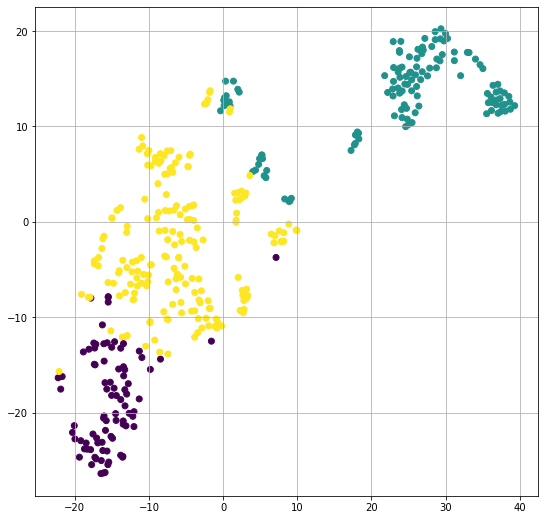

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_kmeans)
plt.grid()
plt.show()

In [34]:
print('Средние значения price: ')
print('Кластер 0: {}'.format(y_train[X_train_kmeans == 0].mean()))
print('Кластер 1: {}'.format(y_train[X_train_kmeans == 1].mean()))
print('Кластер 2: {}'.format(y_train[X_train_kmeans == 2].mean()))

Средние значения price: 
Кластер 0: price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64


In [35]:
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[X_train_kmeans == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[X_train_kmeans == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[X_train_kmeans == 2, 'CRIM'].mean()))

Средние значения CRIM:
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.




In [40]:
X_test_kmeans = kmeans.predict(X_test_scaled)

In [42]:
print('Средние значения price: ')
print('Кластер 0: {}'.format(y_test[X_test_kmeans == 0].mean()))
print('Кластер 1: {}'.format(y_test[X_test_kmeans == 1].mean()))
print('Кластер 2: {}'.format(y_test[X_test_kmeans == 2].mean()))

Средние значения price: 
Кластер 0: price    31.35
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    21.860784
dtype: float64


In [43]:
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[X_test_kmeans == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[X_test_kmeans == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[X_test_kmeans == 2, 'CRIM'].mean()))

Средние значения CRIM:
Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143
Кластер 2: 0.26607882352941176
